<a href="https://colab.research.google.com/github/Husnain-Amjad/Email-Classification/blob/main/SMS_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2024-08-20 09:04:08--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  --.-KB/s    in 0.1s    

2024-08-20 09:04:08 (2.65 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2024-08-20 09:04:08--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[==========

In [ ]:
col_names = ['label', 'text']
train_data = pd.read_csv(train_file_path, delimiter = "\t", names= col_names)
train_text = train_data['text']
train_label = train_data['label']
# train_label = pd.DataFrame([0 if x == 'ham' else 1 for x in train_label])
test_data = pd.read_csv(test_file_path, delimiter = "\t", names= col_names)
test_text = test_data['text']
test_label = test_data['label']
# test_label = pd.DataFrame([0 if x == 'ham' else 1 for x in test_label])

In [ ]:
train_label = pd.DataFrame([0 if x == 'ham' else 1 for x in train_label])
test_label = pd.DataFrame([0 if x == 'ham' else 1 for x in test_label])

In [ ]:
col_names = ['label', 'text']
train_data = pd.read_csv(train_file_path, delimiter = "\t", names= col_names)
train_text = train_data['text']
train_label = train_data['label']
train_label = pd.DataFrame([0 if x == 'ham' else 1 for x in train_label])
test_data = pd.read_csv(test_file_path, delimiter = "\t", names= col_names)
test_text = test_data['text']
test_label = test_data['label']
test_label = pd.DataFrame([0 if x == 'ham' else 1 for x in test_label])

In [ ]:
VOCAB_SIZE = 13484
MAXLEN = 1000

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
train_data = tokenizer.fit_on_texts(train_text)
test_data = tokenizer.fit_on_texts(test_text)
train_sequences = tokenizer.texts_to_sequences(train_text)
test_sequences = tokenizer.texts_to_sequences(test_text)

In [ ]:
from keras.preprocessing import sequence
train_data = sequence.pad_sequences(train_sequences, maxlen=MAXLEN)
test_data = sequence.pad_sequences(test_sequences, maxlen=MAXLEN)


In [ ]:
train_data[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
train_data.shape

(4179, 1000)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
train_data, train_label = smote.fit_resample(train_data, train_label)

In [ ]:
train_data.shape

(7238, 1000)

In [ ]:
model = []

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 256, input_length= MAXLEN),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(256, activation='relu'),9+888888+

    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
class_weights = {0: 1.0, 1: 2.5}
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(train_data, train_label.values, epochs=20, validation_split=0.3, class_weight=class_weights)

Epoch 1/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 26s 143ms/step - accuracy: 0.5140 - loss: 0.9975 - val_accuracy: 1.0000 - val_loss: 0.6918
Epoch 2/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 41s 143ms/step - accuracy: 0.4768 - loss: 0.9906 - val_accuracy: 1.0000 - val_loss: 0.6590
Epoch 3/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - accuracy: 0.5295 - loss: 0.9891 - val_accuracy: 0.0000e+00 - val_loss: 0.7478
Epoch 4/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 41s 143ms/step - accuracy: 0.5357 - loss: 0.9962 - val_accuracy: 0.9733 - val_loss: 0.6197
Epoch 5/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 41s 143ms/step - accuracy: 0.8052 - loss: 0.7096 - val_accuracy: 0.8614 - val_loss: 0.3122
Epoch 6/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 23s 143ms/step - accuracy: 0.9658 - loss: 0.1781 - val_accuracy: 0.9217 - val_loss: 0.2221
Epoch 7/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - accuracy: 0.9870 - loss: 0.0611 - val_accuracy: 0.8660 - val_loss: 0.3757
Epoch 8/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 41s 143ms/step - accuracy: 0.9943 - los

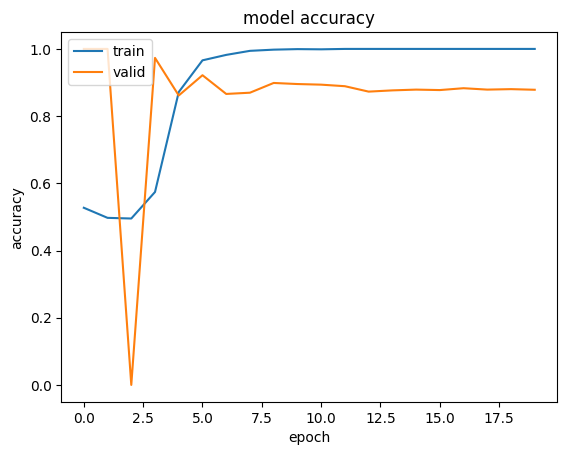

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')

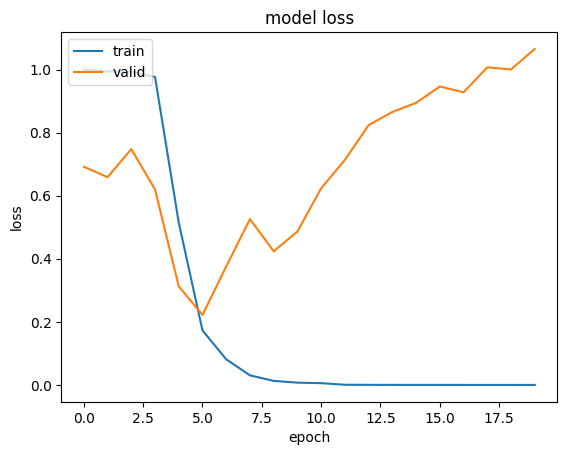

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')

In [ ]:
results = model.evaluate(test_data, test_label)
print(results)

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9739 - loss: 0.2064
[0.25230884552001953, 0.9712643623352051]


In [ ]:
def predict_message(pred_text):
    if isinstance(pred_text, str):
        text = [pred_text]
    elif isinstance(pred_text, list):
        text = pred_text

    for txt in text:
        seq = tokenizer.texts_to_sequences([txt])
        data = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen=910)
        print(f"Text: {txt}\nSequence: {seq}\n")
        prediction = model.predict(data)
        print(f"Raw Prediction: {prediction}\n")

        # Since it's binary classification, prediction[0] will have two values
        spam_prob = prediction[0][1]  # Probability for 'spam' (class 1)
        ham_prob = prediction[0][0]  # Probability for 'ham' (class 0)

        if spam_prob > ham_prob:
            return spam_prob, 'spam'
        else:
            return ham_prob, 'ham'

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(f"Prediction: {prediction}")


Text: how are you doing today?
Sequence: [[50, 22, 3, 159, 89]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Raw Prediction: [[9.9993181e-01 6.8207824e-05]]

Prediction: (0.9999318, 'ham')


In [ ]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


Text: how are you doing today
Sequence: [[50, 22, 3, 159, 89]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Raw Prediction: [[9.9993181e-01 6.8207824e-05]]

Text: sale today! to stop texts call 98912460324
Sequence: [[1248, 89, 2, 84, 470, 16]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Raw Prediction: [[0.08622379 0.9137762 ]]

Text: i dont want to go. can we try it a different day? available sat
Sequence: [[1, 92, 70, 2, 49, 28, 39, 261, 14, 4, 1069, 64, 664, 409]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Raw Prediction: [[9.9997985e-01 2.0156762e-05]]

Text: our new mobile video service is live. just install on your phone to start watching.
Sequence: [[93, 102, 97, 375, 230, 9, 287, 37, 8434, 18, 13, 111, 2, 346, 379]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Raw Prediction: [[2.2710968e-07 9.9999976e-01]]

Text: you have won £1000 cash! call to claim your prize.
Sequence: [[3, 17, 185, 370, 158, 16, 2, 128, 13, 152]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Raw Prediction: [[2.2190014e-09 1.000000